MAJOR PROJECT 
   <br>Loan Prediction

In [104]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [61]:
#dataset
df=pd.read_excel("loan-predictionUC.csv (1) (1) (1).xlsx")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [93]:
#size of dataset
shape=df.shape
print("rows-",shape[0],"\ncolumns-",shape[1])

rows- 614 
columns- 13


In [94]:
#missing values if any
miss_val=df.isnull().sum()
miss_val

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

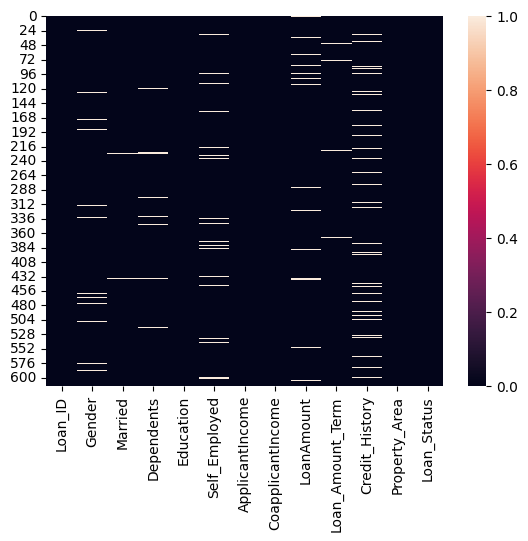

In [95]:
#Visualization-having null values
sb.heatmap(df.isnull())

In [96]:
#filling the columns values Loan_Amount_term
df['Loan_Amount_Term'].fillna(method='ffill',inplace=True)
df['Married'].fillna(method='ffill',inplace=True)
df['Gender'].fillna(method='ffill',inplace=True)

In [97]:
df['Dependents'].replace(to_replace=np.nan,value=0,inplace=True)

df['Self_Employed'].replace(to_replace=np.nan,value='Unknown',inplace=True)


In [98]:
df.dropna(axis=0,inplace=True)

In [99]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [100]:
#Visualization-showing no null values present

<AxesSubplot: >

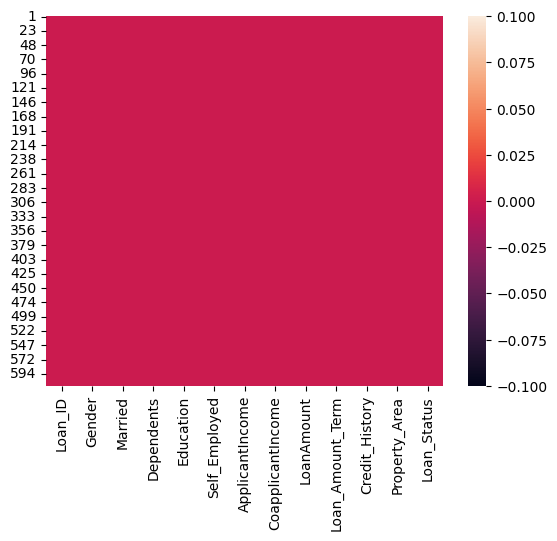

In [101]:
sb.heatmap(df.isnull())

In [102]:
df['Loan_Status'].value_counts()

Y    374
N    169
Name: Loan_Status, dtype: int64

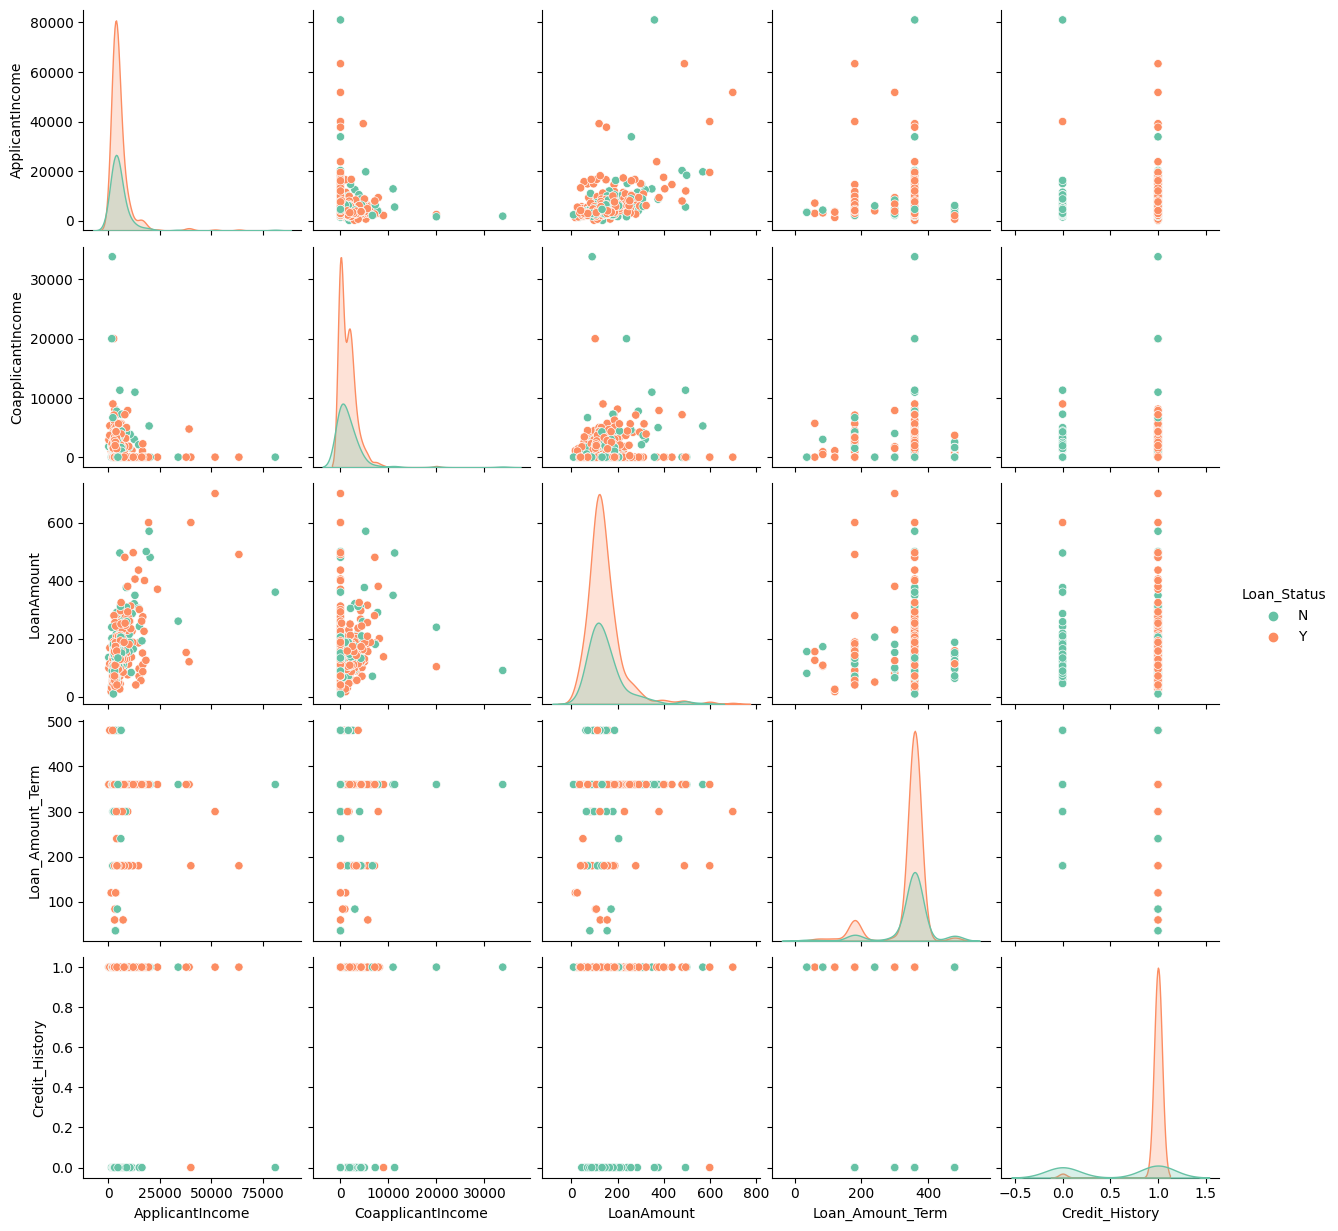

In [103]:
sb.pairplot(data=df, hue='Loan_Status', palette='Set2')
plt.show()

In [52]:
#converting the ordinal to categorical values

le=LabelEncoder()


df['Property_Area']=le.fit(df['Property_Area'])
df['Loan_Status']=le.fit(df['Loan_Status'])

In [58]:
loan_val=list(le.classes_)
list(le.inverse_transform([1]))

['Y']

In [15]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [36]:
X=df.iloc[:,6:12]
Y=df.iloc[:,-1]
X.shape,Y.shape

((543, 6), (543,))

In [38]:
#Dividing the dataset into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=55)

In [39]:
#Scaling the values
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# Linear Regression

In [40]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [41]:
lr.coef_

array([ 0.00601673, -0.01928174, -0.01518532, -0.00948968,  0.26495892,
        0.03114325])

In [42]:
lr.intercept_

0.7050691244239631

In [80]:
predict=lr.predict(X_test)
for i in range(len(predict)):
    predict[i]=round(predict[i])
predict    

array([1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1.])

In [90]:
print('Accuracy Score-',accuracy_score(Y_test,predict))

Accuracy Score- 0.7431192660550459


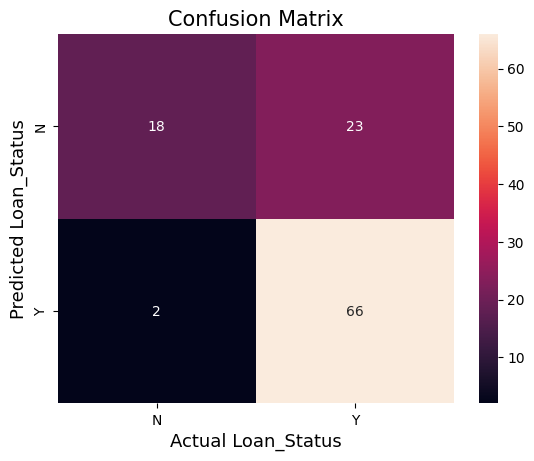

In [82]:
cm = confusion_matrix(Y_test,predict)
label=list(le.inverse_transform([0,1])) 
#Plot the confusion matrix.
sb.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=label,
            yticklabels=label)
plt.ylabel('Predicted Loan_Status',fontsize=13)
plt.xlabel('Actual Loan_Status',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

# Decision Tree Classifier 

In [87]:
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
print(accuracy_score(Y_test,pred))


0.7706422018348624


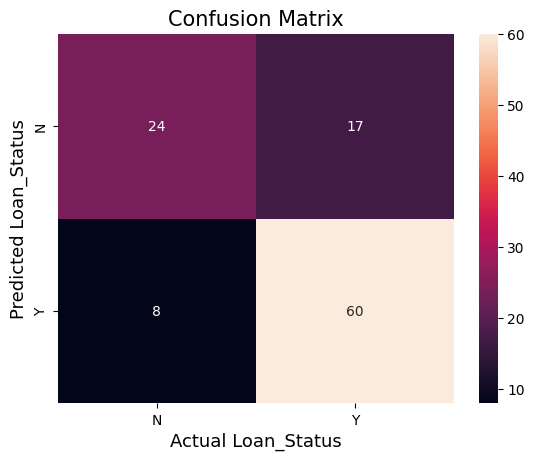

In [89]:
cm = confusion_matrix(Y_test,pred)
label=list(le.inverse_transform([0,1])) 
#Plot the confusion matrix.
sb.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=label,
            yticklabels=label)
plt.ylabel('Predicted Loan_Status',fontsize=13)
plt.xlabel('Actual Loan_Status',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

# SVC

In [114]:
model=SVC()
model.fit(X_train, Y_train)
pred_l=model.predict(X_test)
pred_l

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [115]:
accuracy=classification_report(Y_test, pred_l)
print(accuracy)

              precision    recall  f1-score   support

           0       0.89      0.41      0.57        41
           1       0.73      0.97      0.84        68

    accuracy                           0.76       109
   macro avg       0.81      0.69      0.70       109
weighted avg       0.79      0.76      0.73       109



In [116]:
print(accuracy_score(Y_test,pred_l))

0.7614678899082569


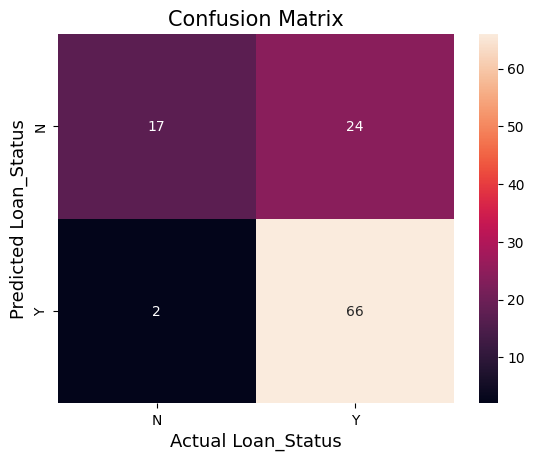

In [117]:
cm = confusion_matrix(Y_test,pred_l)
label=list(le.inverse_transform([0,1])) 
#Plot the confusion matrix.
sb.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=label,
            yticklabels=label)
plt.ylabel('Predicted Loan_Status',fontsize=13)
plt.xlabel('Actual Loan_Status',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()